In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
colors = ["#C37681", "#EAE086", "#838385", "#89C1DF", "#5BAC82"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

In [2]:
bdi3_df = pd.read_csv('../data/teis.csv', dtype = {"Child ID" : object, "Cognitive T-Score" : object})

In [3]:
bdi3_df = bdi3_df.drop(columns = {'Code 1', 'Code 2', 'Code 3', 'Code 4', 'Code 5', 'Code 6', 'Code 7', 'Code 8', 'Code 9', 'Code 10'}, axis =0)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
bdi3_df

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,Adaptive Z-Score,Adaptive T-Score,Adaptive NCE,Social-Emotional Sum of Scaled Scores,Social-Emotional Developmental Quotient,Social-Emotional Percentile Rank,Social-Emotional 95% Confidence Interval,Social-Emotional RDI,Social-Emotional Z-Score,Social-Emotional T-Score,Social-Emotional NCE,Communication Sum of Scaled Scores,Communication Developmental Quotient,Communication Percentile Rank,Communication 95% Confidence Interval,Communication RDI,Communication Z-Score,Communication T-Score,Communication NCE,Motor Sum of Scaled Scores,Motor Developmental Quotient,Motor Percentile Rank,Motor 95% Confidence Interval,Motor RDI,Motor Z-Score,Motor T-Score,Motor NCE,Cognitive Sum of Scaled Scores,Cognitive Developmental Quotient,Cognitive Percentile Rank,Cognitive 95% Confidence Interval,Cognitive RDI,Cognitive Z-Score,Cognitive T-Score,Cognitive NCE,BDI-3 Total Sum of Scaled Scores,BDI-3 Total Developmental Quotient,BDI-3 Total Percentile Rank,BDI-3 Total 90% Confidence Interval,BDI-3 Total 95% Confidence Interval,BDI-3 Total Z-Score,BDI-3 Total T-Score,BDI-3 Total NCE,Adaptive-Self Care Examiner,Adaptive-Self Care Date of Testing,Adaptive-Self Care RS,Adaptive-Self Care SS,Adaptive-Self Care PR,Adaptive-Self Care AE,Adaptive-Self Care RDI,Adaptive-Self Care CSS,Adaptive-Self Care CSS 90%,Adaptive-Self Care Z-Score,Adaptive-Self Care T-Score,Adaptive-Self Care NCE,Adaptive-Personal Responsibility Examiner,Adaptive-Personal Responsibility Date of Testing,Adaptive-Personal Responsibility RS,Adaptive-Personal Responsibility SS,Adaptive-Personal Responsibility PR,Adaptive-Personal Responsibility AE,Adaptive-Personal Responsibility RDI,Adaptive-Personal Responsibility CSS,Adaptive-Personal Responsibility CSS 90%,Adaptive-Personal Responsibility Z-Score,Adaptive-Personal Responsibility T-Score,Adaptive-Personal Responsibility NCE,Social Emotional-Adult Interaction Examiner,Social Emotional-Adult Interaction Date of Testing,Social Emotional-Adult Interaction RS,Social Emotional-Adult Interaction SS,Social Emotional-Adult Interaction PR,Social Emotional-Adult Interaction AE,Social Emotional-Adult Interaction RDI,Social Emotional-Adult Interaction CSS,Social Emotional-Adult Interaction CSS 90%,Social Emotional-Adult Interaction Z-Score,Social Emotional-Adult Interaction T-Score,Social Emotional-Adult Interaction NCE,Social Emotional-Peer Interaction Examiner,Social Emotional-Peer Interaction Date of Testing,Social Emotional-Peer Interaction RS,Social Emotional-Peer Interaction SS,Social Emotional-Peer Interaction PR,Social Emotional-Peer Interaction AE,Social Emotional-Peer Interaction RDI,Social Emotional-Peer Interaction CSS,Social Emotional-Peer Interaction CSS 90%,Social Emotional-Peer Interaction Z-Score,Social Emotional-Peer Interaction T-Score,Social Emotional-Peer Interaction NCE,Social Emotional-Self Concept / Social Role Examiner,Social Emotional-Self Concept / Social Role Date of Testing,Social Emotional-Self Concept / Social Role RS,Social Emotional-Self Concept / Social Role SS,Social Emotional-Self Concept / Social Role PR,Social Emotional-Self Concept / Social Role AE,Social Emotional-Self Concept / Social Role RDI,Social Emotional-Self Concept / Social Role CSS,Social Emotional-Self Concept / Social Role CSS 90%,Social Emotional-Self Concept / Social Role Z-Score,Social Emotional-Self Concept / Social Role T-Score,Social Emotional-Self Concept / Social Role NCE,Communication-Receptive Communication Examiner,Communication-Receptive Communication Date of Testing,Communication-Receptive Communication RS,Communication-Receptive Communication SS,Communication-Receptive Communication PR,Communication-Receptive Communication AE,Communication-Receptive Communication RDI,Communication-Receptive Communication CSS,Communication-Receptive Co

Eligibility is currently based on domains. A child would be considered eligible based on a 40% delay in one area or 25% delay in two areas, as determined by Development Quotient (DQ) scores. A DQ of 70 or less indicates a 40% delay, and a DQ between 71 and 78 indicates a 25% delay. If TEIS added an option for eligibility based on the total score on the BDI-3 total score (DQ score of 70 or less), are there any children who would have qualified that did not qualify based on the current method?

In [6]:
bdi3_df['Standard Approval'] = ''
bdi3_df['Extended Approval'] = ''

columns = [col for col in bdi3_df.columns if 'Developmental Quotient' in col]

columns
#added two new columns. Now I want to loop through and see which students scored a domain DQ of under 70 OR two domain DQ between 71-78


    

['Adaptive Developmental Quotient',
 'Social-Emotional Developmental Quotient',
 'Communication Developmental Quotient',
 'Motor Developmental Quotient',
 'Cognitive Developmental Quotient',
 'BDI-3 Total Developmental Quotient']

In [7]:
bdi3_df['Adaptive DQ Points'] = ''
bdi3_df['Social-Emotional DQ Points'] = ''
bdi3_df['Communication DQ Points'] = ''
bdi3_df['Motor DQ Points'] = ''
bdi3_df['Cognitive DQ Points'] = ''

In [8]:
bdi3_df['Adaptive Developmental Quotient']

0         85.0
1         88.0
2         90.0
3        115.0
4         75.0
         ...  
23942    115.0
23943    115.0
23944    103.0
23945     88.0
23946    105.0
Name: Adaptive Developmental Quotient, Length: 23947, dtype: float64

In [9]:
# bdi3_df.loc[bdi3_df.loc['Adaptive Developmental Quotient'] <= 70, 'Adaptive DQ Points'] = 2
# bdi3_df.loc[bdi3_df.loc['Adaptive Developmental Quotient'] > 70, 'Adaptive DQ Points'] = 0
# bdi3_df.loc[(bdi3_df.loc['Adaptive Developmental Quotient'] <= 71) & (bdi3_df.loc['Adaptive Developmental Quotient'] <= 71), 'Adaptive DQ Points'] = 1

In [10]:
bdi3_df['Adaptive DQ Points'] = bdi3_df['Adaptive Developmental Quotient'].apply(lambda x: 2 if x <= 70 else 1 if 71 <= x <= 78 else 0)
bdi3_df['Social-Emotional DQ Points'] = bdi3_df['Social-Emotional Developmental Quotient'].apply(lambda x: 2 if x <= 70 else 1 if 71 <= x <= 78 else 0)
bdi3_df['Communication DQ Points'] = bdi3_df['Communication Developmental Quotient'].apply(lambda x: 2 if x <= 70 else 1 if 71 <= x <= 78 else 0)
bdi3_df['Motor DQ Points'] = bdi3_df['Motor Developmental Quotient'].apply(lambda x: 2 if x <= 70 else 1 if 71 <= x <= 78 else 0)
bdi3_df['Cognitive DQ Points'] = bdi3_df['Cognitive Developmental Quotient'].apply(lambda x: 2 if x <= 70 else 1 if 71 <= x <= 78 else 0)

In [11]:
points_cols = ['Adaptive DQ Points', 'Social-Emotional DQ Points', 'Communication DQ Points', 'Motor DQ Points', 'Cognitive DQ Points']
bdi3_df['bdi3_df_points'] = bdi3_df[points_cols].sum(axis = 1)
bdi3_df

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,Adaptive Z-Score,Adaptive T-Score,Adaptive NCE,Social-Emotional Sum of Scaled Scores,Social-Emotional Developmental Quotient,Social-Emotional Percentile Rank,Social-Emotional 95% Confidence Interval,Social-Emotional RDI,Social-Emotional Z-Score,Social-Emotional T-Score,Social-Emotional NCE,Communication Sum of Scaled Scores,Communication Developmental Quotient,Communication Percentile Rank,Communication 95% Confidence Interval,Communication RDI,Communication Z-Score,Communication T-Score,Communication NCE,Motor Sum of Scaled Scores,Motor Developmental Quotient,Motor Percentile Rank,Motor 95% Confidence Interval,Motor RDI,Motor Z-Score,Motor T-Score,Motor NCE,Cognitive Sum of Scaled Scores,Cognitive Developmental Quotient,Cognitive Percentile Rank,Cognitive 95% Confidence Interval,Cognitive RDI,Cognitive Z-Score,Cognitive T-Score,Cognitive NCE,BDI-3 Total Sum of Scaled Scores,BDI-3 Total Developmental Quotient,BDI-3 Total Percentile Rank,BDI-3 Total 90% Confidence Interval,BDI-3 Total 95% Confidence Interval,BDI-3 Total Z-Score,BDI-3 Total T-Score,BDI-3 Total NCE,Adaptive-Self Care Examiner,Adaptive-Self Care Date of Testing,Adaptive-Self Care RS,Adaptive-Self Care SS,Adaptive-Self Care PR,Adaptive-Self Care AE,Adaptive-Self Care RDI,Adaptive-Self Care CSS,Adaptive-Self Care CSS 90%,Adaptive-Self Care Z-Score,Adaptive-Self Care T-Score,Adaptive-Self Care NCE,Adaptive-Personal Responsibility Examiner,Adaptive-Personal Responsibility Date of Testing,Adaptive-Personal Responsibility RS,Adaptive-Personal Responsibility SS,Adaptive-Personal Responsibility PR,Adaptive-Personal Responsibility AE,Adaptive-Personal Responsibility RDI,Adaptive-Personal Responsibility CSS,Adaptive-Personal Responsibility CSS 90%,Adaptive-Personal Responsibility Z-Score,Adaptive-Personal Responsibility T-Score,Adaptive-Personal Responsibility NCE,Social Emotional-Adult Interaction Examiner,Social Emotional-Adult Interaction Date of Testing,Social Emotional-Adult Interaction RS,Social Emotional-Adult Interaction SS,Social Emotional-Adult Interaction PR,Social Emotional-Adult Interaction AE,Social Emotional-Adult Interaction RDI,Social Emotional-Adult Interaction CSS,Social Emotional-Adult Interaction CSS 90%,Social Emotional-Adult Interaction Z-Score,Social Emotional-Adult Interaction T-Score,Social Emotional-Adult Interaction NCE,Social Emotional-Peer Interaction Examiner,Social Emotional-Peer Interaction Date of Testing,Social Emotional-Peer Interaction RS,Social Emotional-Peer Interaction SS,Social Emotional-Peer Interaction PR,Social Emotional-Peer Interaction AE,Social Emotional-Peer Interaction RDI,Social Emotional-Peer Interaction CSS,Social Emotional-Peer Interaction CSS 90%,Social Emotional-Peer Interaction Z-Score,Social Emotional-Peer Interaction T-Score,Social Emotional-Peer Interaction NCE,Social Emotional-Self Concept / Social Role Examiner,Social Emotional-Self Concept / Social Role Date of Testing,Social Emotional-Self Concept / Social Role RS,Social Emotional-Self Concept / Social Role SS,Social Emotional-Self Concept / Social Role PR,Social Emotional-Self Concept / Social Role AE,Social Emotional-Self Concept / Social Role RDI,Social Emotional-Self Concept / Social Role CSS,Social Emotional-Self Concept / Social Role CSS 90%,Social Emotional-Self Concept / Social Role Z-Score,Social Emotional-Self Concept / Social Role T-Score,Social Emotional-Self Concept / Social Role NCE,Communication-Receptive Communication Examiner,Communication-Receptive Communication Date of Testing,Communication-Receptive Communication RS,Communication-Receptive Communication SS,Communication-Receptive Communication PR,Communication-Receptive Communication AE,Communication-Receptive Communication RDI,Communication-Receptive Communication CSS,Communication-Receptive Co

In [12]:
bdi3_df['Standard Approval'] = bdi3_df['bdi3_df_points'].apply(lambda x: True if x >= 2 else False)
bdi3_df['Extended Approval'] = bdi3_df['BDI-3 Total Developmental Quotient'].apply(lambda x: True if x < 70 else False)
bdi3_df


,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,Adaptive Z-Score,Adaptive T-Score,Adaptive NCE,Social-Emotional Sum of Scaled Scores,Social-Emotional Developmental Quotient,Social-Emotional Percentile Rank,Social-Emotional 95% Confidence Interval,Social-Emotional RDI,Social-Emotional Z-Score,Social-Emotional T-Score,Social-Emotional NCE,Communication Sum of Scaled Scores,Communication Developmental Quotient,Communication Percentile Rank,Communication 95% Confidence Interval,Communication RDI,Communication Z-Score,Communication T-Score,Communication NCE,Motor Sum of Scaled Scores,Motor Developmental Quotient,Motor Percentile Rank,Motor 95% Confidence Interval,Motor RDI,Motor Z-Score,Motor T-Score,Motor NCE,Cognitive Sum of Scaled Scores,Cognitive Developmental Quotient,Cognitive Percentile Rank,Cognitive 95% Confidence Interval,Cognitive RDI,Cognitive Z-Score,Cognitive T-Score,Cognitive NCE,BDI-3 Total Sum of Scaled Scores,BDI-3 Total Developmental Quotient,BDI-3 Total Percentile Rank,BDI-3 Total 90% Confidence Interval,BDI-3 Total 95% Confidence Interval,BDI-3 Total Z-Score,BDI-3 Total T-Score,BDI-3 Total NCE,Adaptive-Self Care Examiner,Adaptive-Self Care Date of Testing,Adaptive-Self Care RS,Adaptive-Self Care SS,Adaptive-Self Care PR,Adaptive-Self Care AE,Adaptive-Self Care RDI,Adaptive-Self Care CSS,Adaptive-Self Care CSS 90%,Adaptive-Self Care Z-Score,Adaptive-Self Care T-Score,Adaptive-Self Care NCE,Adaptive-Personal Responsibility Examiner,Adaptive-Personal Responsibility Date of Testing,Adaptive-Personal Responsibility RS,Adaptive-Personal Responsibility SS,Adaptive-Personal Responsibility PR,Adaptive-Personal Responsibility AE,Adaptive-Personal Responsibility RDI,Adaptive-Personal Responsibility CSS,Adaptive-Personal Responsibility CSS 90%,Adaptive-Personal Responsibility Z-Score,Adaptive-Personal Responsibility T-Score,Adaptive-Personal Responsibility NCE,Social Emotional-Adult Interaction Examiner,Social Emotional-Adult Interaction Date of Testing,Social Emotional-Adult Interaction RS,Social Emotional-Adult Interaction SS,Social Emotional-Adult Interaction PR,Social Emotional-Adult Interaction AE,Social Emotional-Adult Interaction RDI,Social Emotional-Adult Interaction CSS,Social Emotional-Adult Interaction CSS 90%,Social Emotional-Adult Interaction Z-Score,Social Emotional-Adult Interaction T-Score,Social Emotional-Adult Interaction NCE,Social Emotional-Peer Interaction Examiner,Social Emotional-Peer Interaction Date of Testing,Social Emotional-Peer Interaction RS,Social Emotional-Peer Interaction SS,Social Emotional-Peer Interaction PR,Social Emotional-Peer Interaction AE,Social Emotional-Peer Interaction RDI,Social Emotional-Peer Interaction CSS,Social Emotional-Peer Interaction CSS 90%,Social Emotional-Peer Interaction Z-Score,Social Emotional-Peer Interaction T-Score,Social Emotional-Peer Interaction NCE,Social Emotional-Self Concept / Social Role Examiner,Social Emotional-Self Concept / Social Role Date of Testing,Social Emotional-Self Concept / Social Role RS,Social Emotional-Self Concept / Social Role SS,Social Emotional-Self Concept / Social Role PR,Social Emotional-Self Concept / Social Role AE,Social Emotional-Self Concept / Social Role RDI,Social Emotional-Self Concept / Social Role CSS,Social Emotional-Self Concept / Social Role CSS 90%,Social Emotional-Self Concept / Social Role Z-Score,Social Emotional-Self Concept / Social Role T-Score,Social Emotional-Self Concept / Social Role NCE,Communication-Receptive Communication Examiner,Communication-Receptive Communication Date of Testing,Communication-Receptive Communication RS,Communication-Receptive Communication SS,Communication-Receptive Communication PR,Communication-Receptive Communication AE,Communication-Receptive Communication RDI,Communication-Receptive Communication CSS,Communication-Receptive Co

In [13]:
bdi3_df.loc[(bdi3_df['Standard Approval'] == False) & (bdi3_df['Extended Approval'] == True)]

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,Adaptive Z-Score,Adaptive T-Score,Adaptive NCE,Social-Emotional Sum of Scaled Scores,Social-Emotional Developmental Quotient,Social-Emotional Percentile Rank,Social-Emotional 95% Confidence Interval,Social-Emotional RDI,Social-Emotional Z-Score,Social-Emotional T-Score,Social-Emotional NCE,Communication Sum of Scaled Scores,Communication Developmental Quotient,Communication Percentile Rank,Communication 95% Confidence Interval,Communication RDI,Communication Z-Score,Communication T-Score,Communication NCE,Motor Sum of Scaled Scores,Motor Developmental Quotient,Motor Percentile Rank,Motor 95% Confidence Interval,Motor RDI,Motor Z-Score,Motor T-Score,Motor NCE,Cognitive Sum of Scaled Scores,Cognitive Developmental Quotient,Cognitive Percentile Rank,Cognitive 95% Confidence Interval,Cognitive RDI,Cognitive Z-Score,Cognitive T-Score,Cognitive NCE,BDI-3 Total Sum of Scaled Scores,BDI-3 Total Developmental Quotient,BDI-3 Total Percentile Rank,BDI-3 Total 90% Confidence Interval,BDI-3 Total 95% Confidence Interval,BDI-3 Total Z-Score,BDI-3 Total T-Score,BDI-3 Total NCE,Adaptive-Self Care Examiner,Adaptive-Self Care Date of Testing,Adaptive-Self Care RS,Adaptive-Self Care SS,Adaptive-Self Care PR,Adaptive-Self Care AE,Adaptive-Self Care RDI,Adaptive-Self Care CSS,Adaptive-Self Care CSS 90%,Adaptive-Self Care Z-Score,Adaptive-Self Care T-Score,Adaptive-Self Care NCE,Adaptive-Personal Responsibility Examiner,Adaptive-Personal Responsibility Date of Testing,Adaptive-Personal Responsibility RS,Adaptive-Personal Responsibility SS,Adaptive-Personal Responsibility PR,Adaptive-Personal Responsibility AE,Adaptive-Personal Responsibility RDI,Adaptive-Personal Responsibility CSS,Adaptive-Personal Responsibility CSS 90%,Adaptive-Personal Responsibility Z-Score,Adaptive-Personal Responsibility T-Score,Adaptive-Personal Responsibility NCE,Social Emotional-Adult Interaction Examiner,Social Emotional-Adult Interaction Date of Testing,Social Emotional-Adult Interaction RS,Social Emotional-Adult Interaction SS,Social Emotional-Adult Interaction PR,Social Emotional-Adult Interaction AE,Social Emotional-Adult Interaction RDI,Social Emotional-Adult Interaction CSS,Social Emotional-Adult Interaction CSS 90%,Social Emotional-Adult Interaction Z-Score,Social Emotional-Adult Interaction T-Score,Social Emotional-Adult Interaction NCE,Social Emotional-Peer Interaction Examiner,Social Emotional-Peer Interaction Date of Testing,Social Emotional-Peer Interaction RS,Social Emotional-Peer Interaction SS,Social Emotional-Peer Interaction PR,Social Emotional-Peer Interaction AE,Social Emotional-Peer Interaction RDI,Social Emotional-Peer Interaction CSS,Social Emotional-Peer Interaction CSS 90%,Social Emotional-Peer Interaction Z-Score,Social Emotional-Peer Interaction T-Score,Social Emotional-Peer Interaction NCE,Social Emotional-Self Concept / Social Role Examiner,Social Emotional-Self Concept / Social Role Date of Testing,Social Emotional-Self Concept / Social Role RS,Social Emotional-Self Concept / Social Role SS,Social Emotional-Self Concept / Social Role PR,Social Emotional-Self Concept / Social Role AE,Social Emotional-Self Concept / Social Role RDI,Social Emotional-Self Concept / Social Role CSS,Social Emotional-Self Concept / Social Role CSS 90%,Social Emotional-Self Concept / Social Role Z-Score,Social Emotional-Self Concept / Social Role T-Score,Social Emotional-Self Concept / Social Role NCE,Communication-Receptive Communication Examiner,Communication-Receptive Communication Date of Testing,Communication-Receptive Communication RS,Communication-Receptive Communication SS,Communication-Receptive Communication PR,Communication-Receptive Communication AE,Communication-Receptive Communication RDI,Communication-Receptive Communication CSS,Communication-Receptive Co

Identifying children who scored over 3 total points

In [20]:
three_plus = bdi3_df.loc[bdi3_df['bdi3_df_points'] >= 3]
three_plus['bdi3_df_points'].value_counts()

bdi3_df_points
3     1745
4     1413
5      965
6      903
10     815
8      697
7      638
9      487
Name: count, dtype: int64

<Axes: xlabel='bdi3_df_points', ylabel='Count'>

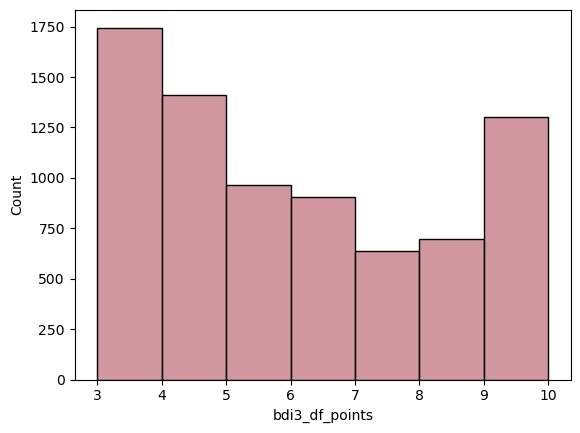

In [144]:
sns.histplot(three_plus, x = three_plus['bdi3_df_points'], bins = 7)

In [29]:
three = three_plus.loc[three_plus['bdi3_df_points'] == 3]
three

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,Adaptive Z-Score,Adaptive T-Score,Adaptive NCE,Social-Emotional Sum of Scaled Scores,Social-Emotional Developmental Quotient,Social-Emotional Percentile Rank,Social-Emotional 95% Confidence Interval,Social-Emotional RDI,Social-Emotional Z-Score,Social-Emotional T-Score,Social-Emotional NCE,Communication Sum of Scaled Scores,Communication Developmental Quotient,Communication Percentile Rank,Communication 95% Confidence Interval,Communication RDI,Communication Z-Score,Communication T-Score,Communication NCE,Motor Sum of Scaled Scores,Motor Developmental Quotient,Motor Percentile Rank,Motor 95% Confidence Interval,Motor RDI,Motor Z-Score,Motor T-Score,Motor NCE,Cognitive Sum of Scaled Scores,Cognitive Developmental Quotient,Cognitive Percentile Rank,Cognitive 95% Confidence Interval,Cognitive RDI,Cognitive Z-Score,Cognitive T-Score,Cognitive NCE,BDI-3 Total Sum of Scaled Scores,BDI-3 Total Developmental Quotient,BDI-3 Total Percentile Rank,BDI-3 Total 90% Confidence Interval,BDI-3 Total 95% Confidence Interval,BDI-3 Total Z-Score,BDI-3 Total T-Score,BDI-3 Total NCE,Adaptive-Self Care Examiner,Adaptive-Self Care Date of Testing,Adaptive-Self Care RS,Adaptive-Self Care SS,Adaptive-Self Care PR,Adaptive-Self Care AE,Adaptive-Self Care RDI,Adaptive-Self Care CSS,Adaptive-Self Care CSS 90%,Adaptive-Self Care Z-Score,Adaptive-Self Care T-Score,Adaptive-Self Care NCE,Adaptive-Personal Responsibility Examiner,Adaptive-Personal Responsibility Date of Testing,Adaptive-Personal Responsibility RS,Adaptive-Personal Responsibility SS,Adaptive-Personal Responsibility PR,Adaptive-Personal Responsibility AE,Adaptive-Personal Responsibility RDI,Adaptive-Personal Responsibility CSS,Adaptive-Personal Responsibility CSS 90%,Adaptive-Personal Responsibility Z-Score,Adaptive-Personal Responsibility T-Score,Adaptive-Personal Responsibility NCE,Social Emotional-Adult Interaction Examiner,Social Emotional-Adult Interaction Date of Testing,Social Emotional-Adult Interaction RS,Social Emotional-Adult Interaction SS,Social Emotional-Adult Interaction PR,Social Emotional-Adult Interaction AE,Social Emotional-Adult Interaction RDI,Social Emotional-Adult Interaction CSS,Social Emotional-Adult Interaction CSS 90%,Social Emotional-Adult Interaction Z-Score,Social Emotional-Adult Interaction T-Score,Social Emotional-Adult Interaction NCE,Social Emotional-Peer Interaction Examiner,Social Emotional-Peer Interaction Date of Testing,Social Emotional-Peer Interaction RS,Social Emotional-Peer Interaction SS,Social Emotional-Peer Interaction PR,Social Emotional-Peer Interaction AE,Social Emotional-Peer Interaction RDI,Social Emotional-Peer Interaction CSS,Social Emotional-Peer Interaction CSS 90%,Social Emotional-Peer Interaction Z-Score,Social Emotional-Peer Interaction T-Score,Social Emotional-Peer Interaction NCE,Social Emotional-Self Concept / Social Role Examiner,Social Emotional-Self Concept / Social Role Date of Testing,Social Emotional-Self Concept / Social Role RS,Social Emotional-Self Concept / Social Role SS,Social Emotional-Self Concept / Social Role PR,Social Emotional-Self Concept / Social Role AE,Social Emotional-Self Concept / Social Role RDI,Social Emotional-Self Concept / Social Role CSS,Social Emotional-Self Concept / Social Role CSS 90%,Social Emotional-Self Concept / Social Role Z-Score,Social Emotional-Self Concept / Social Role T-Score,Social Emotional-Self Concept / Social Role NCE,Communication-Receptive Communication Examiner,Communication-Receptive Communication Date of Testing,Communication-Receptive Communication RS,Communication-Receptive Communication SS,Communication-Receptive Communication PR,Communication-Receptive Communication AE,Communication-Receptive Communication RDI,Communication-Receptive Communication CSS,Communication-Receptive Co

In [34]:
sk_1 = bdi3_df.groupby(['Standard Approval', 'Extended Approval'])['Child ID'].count().reset_index()
sk_1.columns = ['source', 'target', 'value']

In [35]:
sk_1

,source,target,value
0,False,False,12297
1,True,False,7853
2,True,True,3797


In [ ]:
#points_cols 

In [50]:
adaptive_points = bdi3_df['Adaptive DQ Points'].value_counts().reset_index()

In [60]:
adaptive_points['point_type'] = 'Adaptive'
adaptive_points = adaptive_points.rename(columns = {'Adaptive DQ Points': 'points'})

In [61]:
social_emo_points = bdi3_df['Social-Emotional DQ Points'].value_counts().reset_index()
social_emo_points['point_type'] = 'Social-Emotional'
social_emo_points = social_emo_points.rename(columns = {'Social-Emotional DQ Points': 'points'})

In [62]:
comm_points = bdi3_df['Communication DQ Points'].value_counts().reset_index()
comm_points['point_type'] = 'Communication'
comm_points = comm_points.rename(columns = {'Communication DQ Points': 'points'})

In [63]:
motor_points = bdi3_df['Motor DQ Points'].value_counts().reset_index()
motor_points['point_type'] = 'Motor'
motor_points = motor_points = motor_points.rename(columns = {'Motor DQ Points': 'points'})

In [64]:
cog_points = bdi3_df['Cognitive DQ Points'].value_counts().reset_index()
cog_points['point_type'] = 'Cognitive'
cog_points = cog_points.rename(columns = {'Cognitive DQ Points': 'points'})

In [66]:
points_df = pd.concat([adaptive_points, social_emo_points, comm_points, motor_points, cog_points], axis = 0)
points_df

,points,count,point_type
0,0,17315,Adaptive
1,2,4708,Adaptive
2,1,1924,Adaptive
0,0,19773,Social-Emotional
1,2,2176,Social-Emotional
2,1,1998,Social-Emotional
0,0,12681,Communication
1,2,8885,Communication
2,1,2381,Communication
0,0,19977,Motor


C:\Users\rose\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


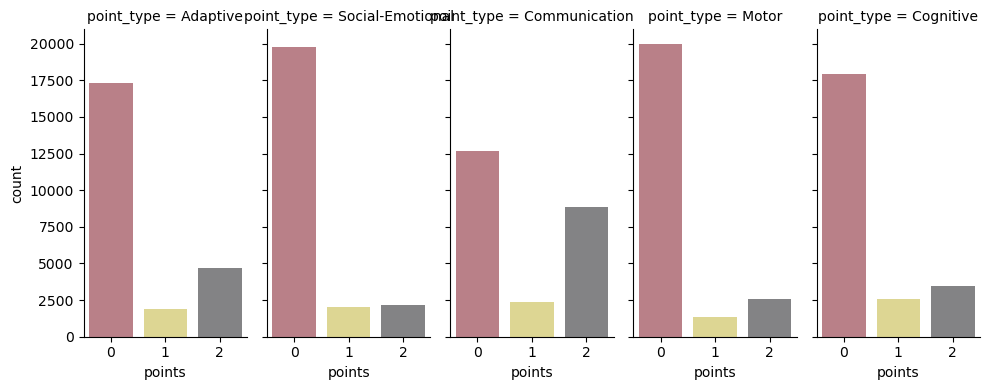

In [145]:
sns.catplot(
    points_df, kind='bar',
    x = 'points', y='count', col = 'point_type',
    height = 4, aspect = .5)


In [99]:
adaptive_points = three_plus['Adaptive DQ Points'].value_counts().reset_index()
adaptive_points['point_type'] = 'Adaptive'
adaptive_points = adaptive_points.rename(columns = {'Adaptive DQ Points': 'points'})

social_emo_points = three_plus['Social-Emotional DQ Points'].value_counts().reset_index()
social_emo_points['point_type'] = 'Social-Emotional'
social_emo_points = social_emo_points.rename(columns = {'Social-Emotional DQ Points': 'points'})

comm_points = three_plus['Communication DQ Points'].value_counts().reset_index()
comm_points['point_type'] = 'Communication'
comm_points = comm_points.rename(columns = {'Communication DQ Points': 'points'})

motor_points = three_plus['Motor DQ Points'].value_counts().reset_index()
motor_points['point_type'] = 'Motor'
motor_points = motor_points = motor_points.rename(columns = {'Motor DQ Points': 'points'})

cog_points = three_plus['Cognitive DQ Points'].value_counts().reset_index()
cog_points['point_type'] = 'Cognitive'
cog_points = cog_points.rename(columns = {'Cognitive DQ Points': 'points'})

three_points_df = pd.concat([adaptive_points, social_emo_points, comm_points, motor_points, cog_points], axis = 0)
three_points_df

,points,count,point_type
0,2,3977,Adaptive
1,0,2401,Adaptive
2,1,1285,Adaptive
0,0,3757,Social-Emotional
1,2,2138,Social-Emotional
2,1,1768,Social-Emotional
0,2,6516,Communication
1,1,590,Communication
2,0,557,Communication
0,0,4134,Motor


C:\Users\rose\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


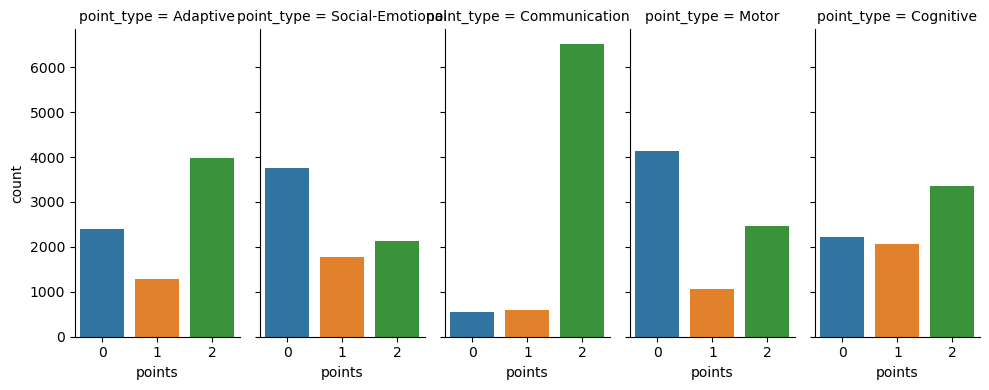

In [91]:
sns.catplot(
    three_points_df, kind='bar',
    x = 'points', y='count', col = 'point_type',
    height = 4, aspect = .5)

In [93]:
four_pt = bdi3_df.loc[bdi3_df['bdi3_df_points'] == 4]
five_pt = bdi3_df.loc[bdi3_df['bdi3_df_points'] == 5]
six_pt = bdi3_df.loc[bdi3_df['bdi3_df_points'] == 6]
seven_pt = bdi3_df.loc[bdi3_df['bdi3_df_points'] == 7]
eight_pt = bdi3_df.loc[bdi3_df['bdi3_df_points'] == 8]
nine_pt = bdi3_df.loc[bdi3_df['bdi3_df_points'] == 9]

In [129]:
def points_func(df):

        adaptive_points = df['Adaptive DQ Points'].value_counts().reset_index()
        adaptive_points['point_type'] = 'Adaptive'
        adaptive_points = adaptive_points.rename(columns = {'Adaptive DQ Points': 'points'})
        

        social_emo_points = df['Social-Emotional DQ Points'].value_counts().reset_index()
        social_emo_points['point_type'] = 'Social-Emotional'
        social_emo_points = social_emo_points.rename(columns = {'Social-Emotional DQ Points': 'points'})
        


        comm_points = df['Communication DQ Points'].value_counts().reset_index()
        comm_points['point_type'] = 'Communication'
        comm_points = comm_points.rename(columns = {'Communication DQ Points': 'points'})
        

        motor_points = df['Motor DQ Points'].value_counts().reset_index()
        motor_points['point_type'] = 'Motor'
        motor_points = motor_points = motor_points.rename(columns = {'Motor DQ Points': 'points'})
        

        cog_points = df['Cognitive DQ Points'].value_counts().reset_index()
        cog_points['point_type'] = 'Cognitive'
        cog_points = cog_points.rename(columns = {'Cognitive DQ Points': 'points'})
        

        end_df = pd.concat([adaptive_points, social_emo_points, comm_points, motor_points, cog_points], axis = 0)
        return end_df

In [130]:
four_df = points_func(four_pt)
five_df = points_func(five_pt)
six_df = points_func(six_pt)
seven_df = points_func(seven_pt)
eight_df = points_func(eight_pt)
nine_df = points_func(nine_pt)

In [137]:
four_df['total_points_per_child'] = 4
five_df['total_points_per_child'] = 5
six_df['total_points_per_child'] = 6
seven_df['total_points_per_child'] = 7
eight_df['total_points_per_child'] = 8
nine_df['total_points_per_child'] = 9
three_points_df['total_points_per_child'] = 3

In [138]:
three_thru_nine_pts = pd.concat([three_points_df, four_df, five_df, six_df, seven_df, eight_df, nine_df], axis = 0)

In [139]:
three_thru_nine_pts

,points,count,point_type,total_points_per_child
0,2,3977,Adaptive,3
1,0,2401,Adaptive,3
2,1,1285,Adaptive,3
0,0,3757,Social-Emotional,3
1,2,2138,Social-Emotional,3
...,...,...,...,...
1,1,7,Communication,9
0,2,373,Motor,9
1,1,114,Motor,9
0,2,432,Cognitive,9


C:\Users\rose\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


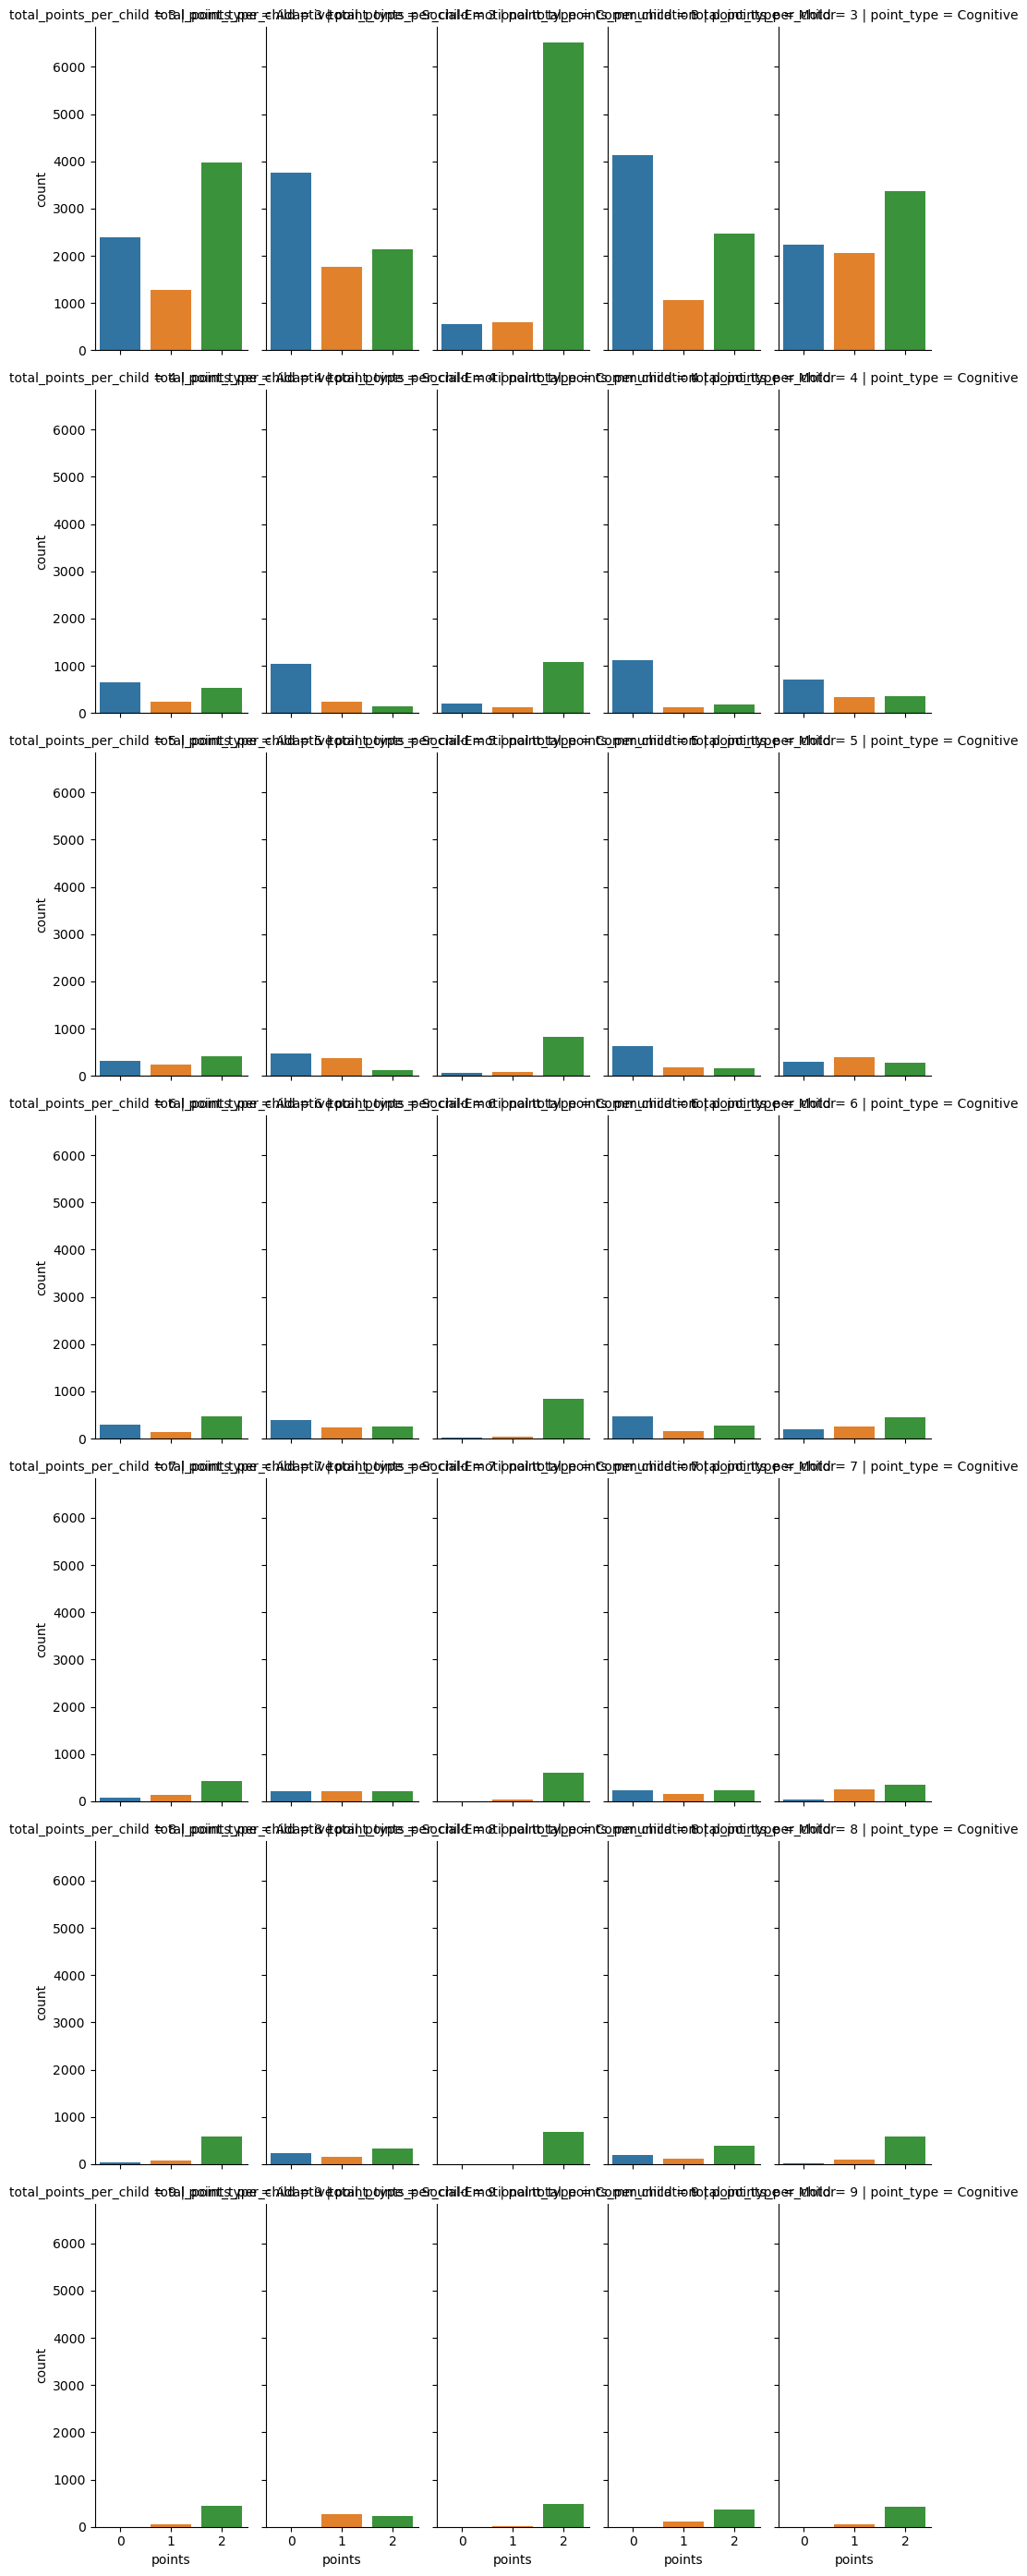

In [140]:
sns.catplot(
    three_thru_nine_pts, kind='bar',
    x = 'points', y='count', col = 'point_type', row = 'total_points_per_child',
    height = 4, aspect = .5)

In [160]:
standard_counts = bdi3_df['Standard Approval'].value_counts().reset_index()
standard_counts = standard_counts.rename(columns = {'Standard Approval': 'Eligibility', 'count':'Child Count'})
standard_counts['Eligibility Type'] = 'Standard'
standard_counts

,Eligibility,Child Count,Eligibility Type
0,False,12297,Standard
1,True,11650,Standard


In [161]:
extended_counts = bdi3_df['Extended Approval'].value_counts().reset_index()
extended_counts = standard_counts.rename(columns = {'Extended Approval': 'Extended', 'count':'Child Count'})
extended_counts['Eligibility Type'] = 'Extended'
extended_counts

,Eligibility,Child Count,Eligibility Type
0,False,12297,Extended
1,True,11650,Extended


In [162]:
len(bdi3_df.loc[(bdi3_df['Standard Approval'] == True) & (bdi3_df['Extended Approval'] == False)])

7853

There are 7853 students who are eligible under the standar approval but not the Extended approval, but none who would meet the Extended approval and not the standard. 11650 students qualify under Standard Approval and 3797 under the Extended approval

In [163]:
len(bdi3_df.loc[(bdi3_df['Standard Approval'] == False) & (bdi3_df['Extended Approval'] == True)])

0

In [164]:
approval_counts = pd.concat([standard_counts, extended_counts], axis=0)
approval_counts = approval_counts.loc[approval_counts['Eligibility'] == True]

Categories: Standard, Extended
Subcategories: Standard: Eligible due to two points in one domains, 
                         Eligible due to one point in two domains
                         Eligible from BOTH
               Extended: Eligible from BDI3 total?

In [ ]:
#How do I want to go about this? I have a DQ Points column for each domain. The max points in a column is TWO. If thye have at least one 2 and a total score of 4 they qualify either way